# SALES FORECASTING USING MACHINE LEARNING DONE BY TINASHE HAFE 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import seaborn as sns
import plotly.express as px

import matplotlib.patches as patches
import plotly.graph_objs as go
from plotly.offline import iplot
from math import sqrt
import warnings


# LOADING THE DATA FROM WALMART SALES 

In [2]:
features=pd.read_csv("data/features.csv")
store=pd.read_csv("data/stores.csv")
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.txt")

In [3]:
features.head ()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
features.describe()


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [5]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [6]:
features.shape

(8190, 12)

In [7]:
store.shape

(45, 3)

In [8]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
#reseting train data set
train=train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train=train.reset_index()
train.head(10)

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
5,1,2010-03-12,1439541.59
6,1,2010-03-19,1472515.79
7,1,2010-03-26,1404429.92
8,1,2010-04-02,1594968.28
9,1,2010-04-09,1545418.53


In [11]:
#merging train and feature
data=pd.merge(train,features,on=['Store','Date'],how='inner')
data.head(5)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
#marging store with data
data=pd.merge(data,store,on=['Store'],how='inner')
data.head(5)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [13]:
#sorting values of Data
data=data.sort_values(by='Date')
data.head(5)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,NaN,NaN,NaN,NaN,NaN,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,C,42988


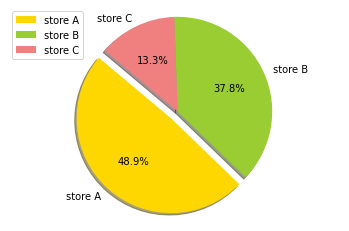

In [14]:
#pie-chart for the visual representation of store types
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Type', ylabel='count'>

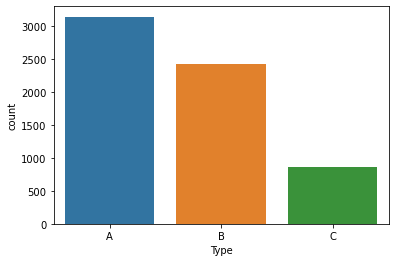

In [15]:
sns.countplot(x="Type", data=data)

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

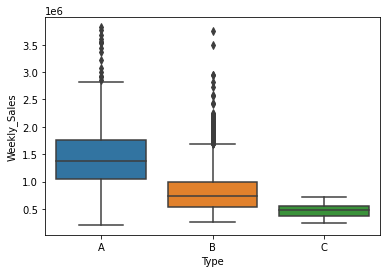

In [16]:
sns.boxplot(x='Type',y='Weekly_Sales',data=data)

<AxesSubplot:ylabel='Frequency'>

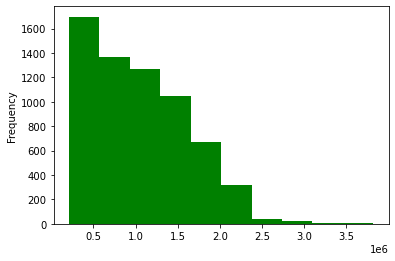

In [17]:
#Histogram of Weekly_sales
data["Weekly_Sales"].plot.hist(color='g')

In [18]:
# def scatter(train_merge, column):
# plt.figure() ,plt.scatter(train_merge[column] , train_merge['Weekly_Sales']), plt.ylabel('Weekly_Sales') ,plt.xlabel(column)
# scatter(data, 'Fuel_Price')  # with respect to Fuel_Price
# scatter(data, 'Size')  # with respect to Size
# scatter(data, 'CPI')  # with respect to CPI
# scatter(data, 'Type')  # with respect to Type
# scatter(data, 'IsHoliday') # with respect to IsHoliday
# scatter(data, 'Unemployment')  # with respect to Unemployment
# scatter(data, 'Temperature') # with respect to Temperature
# scatter(data, 'Store') # with respect to Store
# scatter(data, 'Dept')  # with respect to Dept

In [19]:
data.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Type               0
Size               0
dtype: int64

<AxesSubplot:>

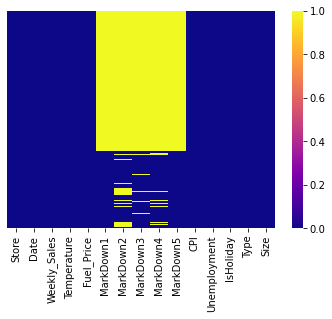

In [20]:
sns.heatmap(data.isnull(),yticklabels=False, cmap="plasma")

In [21]:
data=data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988
3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107
3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557
3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533
3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819
2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819


In [22]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

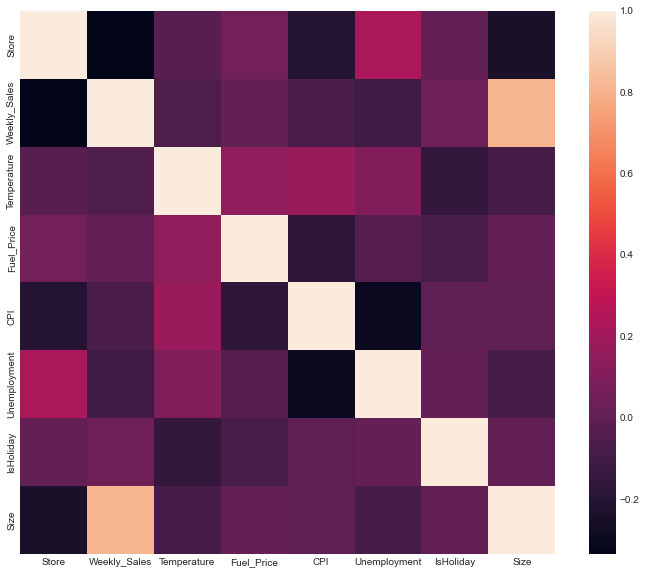

In [23]:
#correlation

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr())
plt.show()

<AxesSubplot:>

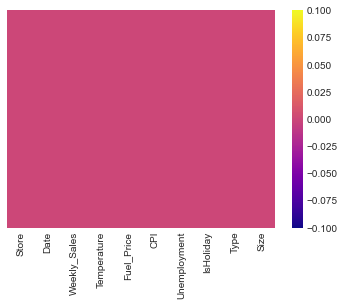

In [24]:
sns.heatmap(data.isnull(),yticklabels=False, cmap="plasma")

In [25]:
data['Holiday']=[int(i) for i in list(data.IsHoliday)]
data.head(5)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0


In [26]:
Type_dummy=pd.get_dummies(data['Type'],drop_first=True)
Type_dummy.head(5)

,B,C
0,0,0
1287,1,0
5148,0,1
2288,1,0
4147,0,1


In [27]:
#viewing the last five rows of our data
Type_dummy.tail(5)

,B,C
3574,1,0
714,1,0
5719,0,0
2573,1,0
6434,1,0


In [28]:
data=pd.concat([data,Type_dummy],axis=1)
data.head(5)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0,0,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0,1,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0,0,1
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0,1,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0,0,1


In [29]:
data.tail(5)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday,B,C
3574,25,2012-10-26,688940.94,56.69,3.882,216.151590,7.293,False,B,128107,0,1,0
714,5,2012-10-26,319550.77,71.70,3.506,224.037814,5.422,False,B,34875,0,1,0
5719,40,2012-10-26,921264.52,49.65,3.917,138.728161,4.145,False,A,155083,0,0,0
2573,18,2012-10-26,1127516.25,56.09,3.917,138.728161,8.243,False,B,120653,0,1,0
6434,45,2012-10-26,760281.43,58.85,3.882,192.308899,8.667,False,B,118221,0,1,0


In [30]:
# removing non integer values from our dataset
data=data.drop(['Type','IsHoliday'],axis=1)
data.drop(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315,0,0,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,126512,0,1,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,39910,0,0,1
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,93188,0,1,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,42988,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,56.69,3.882,216.151590,7.293,128107,0,1,0
714,5,2012-10-26,319550.77,71.70,3.506,224.037814,5.422,34875,0,1,0
5719,40,2012-10-26,921264.52,49.65,3.917,138.728161,4.145,155083,0,0,0
2573,18,2012-10-26,1127516.25,56.09,3.917,138.728161,8.243,120653,0,1,0


# Machine learning section

1.Splitting the  data into train and test
2.Applying linear regression.
3.Value Prediction
4.Model Evaluation

In [31]:
# 1. splitting data in input and output
X=data.drop(['Weekly_Sales','Store','Date'],axis=1)
y=data['Weekly_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [32]:
LR=LinearRegression(normalize=True)
LR.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





LinearRegression(normalize=True)

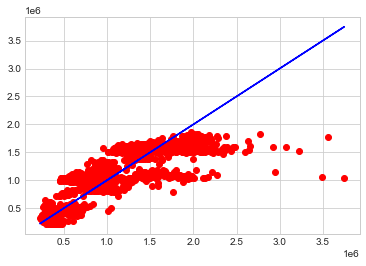

In [33]:
# 3. Predicting the data for test value using  linear regression.
y_pred=LR.predict(X_test)
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [34]:
#Evaluating the model by calculating errors by the root mean square error and R -squared.

Root_mean_square_error=np.sqrt(np.mean(np.square(y_test-y_pred)))
print(Root_mean_square_error)

328756.90352165024


In [35]:
# to ge the r_score 
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.6651192551680916


In [36]:
#doing the prediction by inputing a tuple
prediction=LR.predict(pd.DataFrame([(40.37,2.876,173.325456,7.934,103464,0,0,0)]))
print(prediction)

[771656.06920986]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [37]:
#doing the prediction
data = pd.DataFrame(data={"Predicted Sales": y_pred.flatten()})
 #print(data )

In [38]:
data.head(10)

,Predicted Sales
0,1.404079e+06
1,9.822600e+05
2,2.682196e+05
3,1.513659e+06
4,4.467806e+05
5,2.652981e+05
6,5.156689e+05
7,4.954332e+05
8,1.526810e+06
9,1.232423e+06


In [39]:
pd.DataFrame(data).to_csv('data/Predicted.csv')

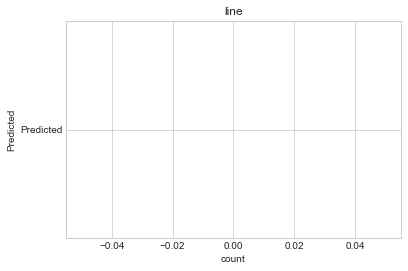

In [42]:
import matplotlib.pyplot as plt

plt.plot('Predicted')
plt.title('line')
plt.xlabel('count')
plt.ylabel('Predicted')
plt.show()